In [1]:
import numpy as np
import pandas as pd

# Step -1: Business Problem
- Detail Analytical Report on given data

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

# step 2.1 Load the Data

In [3]:
df = pd.read_excel(r"C:\Users\SHRI\OneDrive\Desktop\DataScience_DataFiles\hr-data.xlsx")
df

,Name,Gender,Age,Rating,Date Joined,Department,Salary,Country
0,Parasuramudu Jamakayala,Male,20,Average,2020-10-18,Website,112650,IND
1,Yedukondalu Panditula,Male,32,Above average,2021-04-07,Website,43840,IND
2,Devsena Veluvalapalli,Female,31,Average,2022-04-12,Procurement,103550,IND
3,Gopal Venkata,Male,32,Average,2021-05-23,HR,45510,IND
4,Vasavi Veeravasarapu,Female,37,Poor,2020-09-11,Finance,115440,IND
...,...,...,...,...,...,...,...,...
178,Elia Cockton,Female,33,Average,2021-04-26,Website,75280,NZ
179,Gigi Bohling,Male,33,Average,2021-07-08,Sales,74550,NZ
180,Ebonee Roxburgh,Male,30,Average,2022-05-20,Procurement,67950,NZ
181,Shayne Stegel,Male,42,Poor,2022-06-19,Finance,70270,NZ


Text(0, 0.5, 'Count')

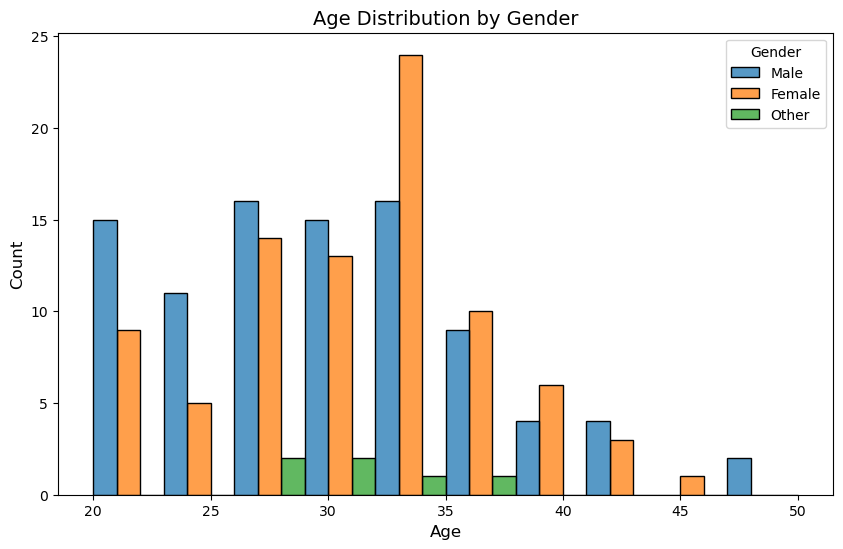

In [4]:
# Analysis related to gender and age


# Age Distribution by Gender


plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Gender', multiple='dodge' ,bins=10)

plt.title('Age Distribution by Gender', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)


In [5]:
df["Age"].mean()

30.48087431693989

In [14]:
# Average Salary by Gender and Age Group: What is the average salary for different age groups (e.g., 20-30, 31-40, 41-50) for each gender? How does salary differ based on age and gender?
bins = [19, 30, 40, 50]  # Numerical ranges
labels = ['20-30', '31-40', '41-50']  # Corresponding labels

# Create the Age Group column
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)
df.head()


,Name,Gender,Age,Rating,Date Joined,Department,Salary,Country,Age_Group
0,Parasuramudu Jamakayala,Male,20,Average,2020-10-18,Website,112650,IND,20-30
1,Yedukondalu Panditula,Male,32,Above average,2021-04-07,Website,43840,IND,31-40
2,Devsena Veluvalapalli,Female,31,Average,2022-04-12,Procurement,103550,IND,31-40
3,Gopal Venkata,Male,32,Average,2021-05-23,HR,45510,IND,31-40
4,Vasavi Veeravasarapu,Female,37,Poor,2020-09-11,Finance,115440,IND,31-40


In [7]:
average_salary = df.groupby(["Gender", "Age_Group"])['Salary'].mean()
average_salary 

Gender  Age_Group
Female  20-30         79770.588235
        31-40         79274.444444
        41-50         94935.000000
Male    20-30         74920.000000
        31-40         71613.437500
        41-50         58973.333333
Other   20-30         77350.000000
        31-40        103375.000000
        41-50                  NaN
Name: Salary, dtype: float64

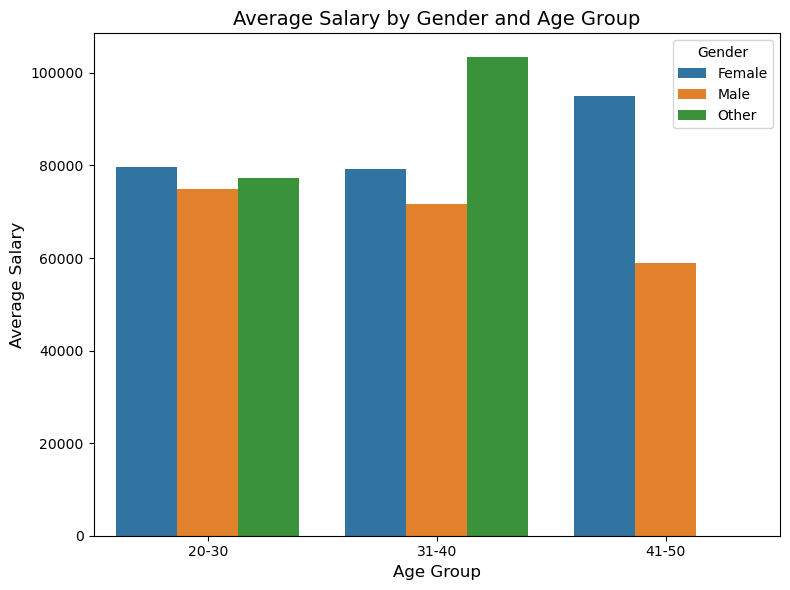

In [12]:

average_salary_df = average_salary.reset_index()

# Bar plot using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(data=average_salary_df, x='Age_Group', y='Salary', hue='Gender')

# Add labels and title
plt.title('Average Salary by Gender and Age Group', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Average Salary', fontsize=12)
plt.legend(title='Gender', fontsize=10)



plt.show()


In [16]:
# Age Group with the Highest Salary by Gender:
#Which age group has the highest average salary for each gender? 
# are older employees earning more than younger employees within each gender?

highest_salary = df.groupby(["Age_Group", "Gender"])["Salary"].max()
highest_salary

Age_Group  Gender
20-30      Female    119110.0
           Male      113280.0
           Other      90700.0
31-40      Female    118100.0
           Male      118840.0
           Other     115440.0
41-50      Female    114870.0
           Male       70610.0
           Other          NaN
Name: Salary, dtype: float64

<Axes: xlabel='Age_Group', ylabel='Salary'>

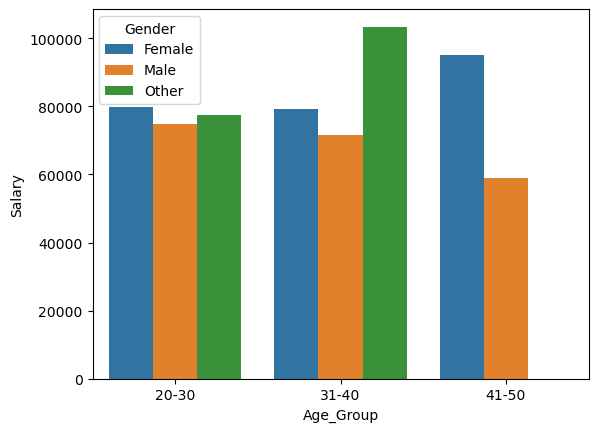

In [23]:
sns.barplot(data=average_salary_df, x='Age_Group', y='Salary', hue='Gender')

In [57]:
#Gender and Age Impact on Employee Rating: 
# Is there any correlation between gender, age, and employee ratings (e.g., Poor, Average, Above Average)? 
# Do older employees tend to have better ratings, and does this vary by gender?

# Group by Gender and Age Group and calculate the mean Rating
rating_map = {'Poor': 1, 'Average': 2, 'Above average': 3}  # Encoding Ratings numerically
df['Rating_Num'] = df['Rating'].map(rating_map)


mean_ratings = df.groupby(['Gender', 'Age_Group'])['Rating_Num'].mean().reset_index()
mean_ratings

rating_distribution = df.groupby(['Gender','Age_Group','Rating_Num']).size()
rating_distribution

Gender  Age_Group  Rating_Num
Female  20-30      1.0            4
                   2.0           28
                   3.0            4
        31-40      1.0            3
                   2.0           36
                   3.0            2
        41-50      1.0            0
                   2.0            2
                   3.0            0
Male    20-30      1.0            4
                   2.0           38
                   3.0            8
        31-40      1.0            2
                   2.0           26
                   3.0            4
        41-50      1.0            2
                   2.0            4
                   3.0            0
Other   20-30      1.0            0
                   2.0            2
                   3.0            2
        31-40      1.0            1
                   2.0            1
                   3.0            0
        41-50      1.0            0
                   2.0            0
                   3.0            

In [30]:
pd.crosstab(df["Gender"],df["Age_Group"])

Age_Group,20-30,31-40,41-50
Gender,,,
Female,36,45,4
Male,54,32,6
Other,4,2,0


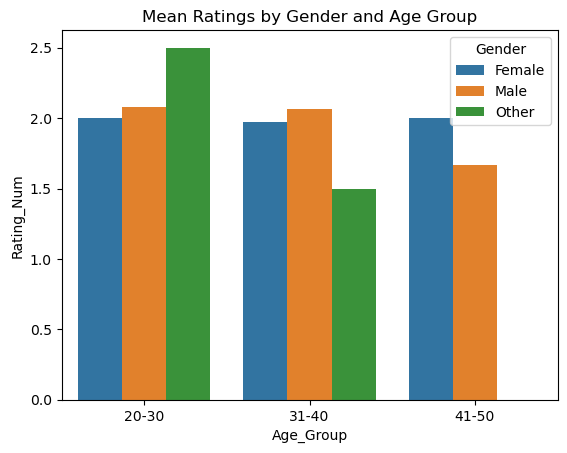

In [59]:
sns.barplot(data=mean_ratings, x='Age_Group', y='Rating_Num', hue='Gender')
plt.title("Mean Ratings by Gender and Age Group")
plt.show()

In [58]:
print(type(mean_ratings)) 

<class 'pandas.core.frame.DataFrame'>
